In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # A great library for interactive plots

# Set some display options for pandas
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Define file paths
# We are inside the /app/notebooks directory in the container
DATA_DIR = "../data/parquet/"
SPX_FILE = DATA_DIR + "NDX_20240510.parquet"

# Load the data using pandas
try:
    spx_df = pd.read_parquet(SPX_FILE)
    print("Data loaded successfully!")
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure you have run the `create_mock_data.py` script first.")

Data loaded successfully!


In [3]:
# --- Explore the SPX Data ---
print("--- SPX Data ---")
print("Shape of the data (rows, columns):", spx_df.shape)
print("\nFirst 5 rows:")
spx_df.head()

--- SPX Data ---
Shape of the data (rows, columns): (391, 8)

First 5 rows:


,open,high,low,close,volume,vwap,transactions,otc
timestamp,,,,,,,,
2024-05-10 13:30:00,18171.145506,18173.302315,18162.127835,18165.168581,None,None,None,None
2024-05-10 13:31:00,18166.212296,18187.013606,18162.688491,18184.695696,None,None,None,None
2024-05-10 13:32:00,18184.399708,18196.538170,18184.399708,18191.364139,None,None,None,None
2024-05-10 13:33:00,18191.368582,18200.273139,18191.368582,18198.292608,None,None,None,None
2024-05-10 13:34:00,18198.840346,18213.578423,18198.840346,18213.578423,None,None,None,None


In [4]:
# Basic info and statistics for SPX data
print("\nSPX Data Info:")
spx_df.info()

print("\n\nSPX Descriptive Statistics:")
spx_df.describe()



SPX Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 391 entries, 2024-05-10 13:30:00 to 2024-05-10 20:00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          391 non-null    float64
 1   high          391 non-null    float64
 2   low           391 non-null    float64
 3   close         391 non-null    float64
 4   volume        0 non-null      object 
 5   vwap          0 non-null      object 
 6   transactions  0 non-null      object 
 7   otc           0 non-null      object 
dtypes: float64(4), object(4)
memory usage: 27.5+ KB


SPX Descriptive Statistics:


,open,high,low,close
count,391.000000,391.000000,391.000000,391.000000
mean,18150.413902,18152.786205,18148.033571,18150.376485
std,26.840497,27.283121,26.406619,26.811219
min,18102.682158,18108.431722,18099.725389,18102.761964
25%,18132.960633,18134.546093,18131.069947,18132.875470
50%,18145.122489,18147.438355,18141.983378,18145.222492
75%,18157.634067,18159.431686,18155.762070,18157.697698
max,18244.260204,18247.608639,18240.127318,18244.161004


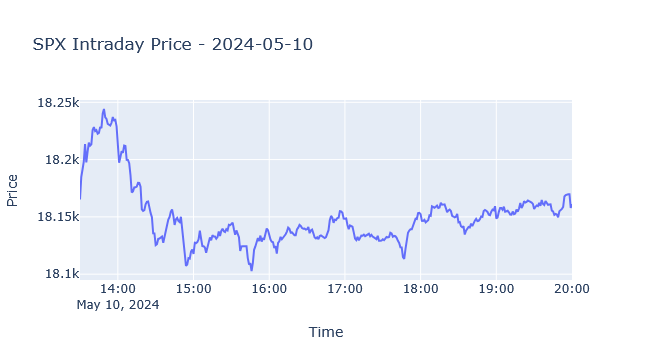

In [5]:
# Plot the SPX closing price to visualize the intraday movement
fig = px.line(spx_df, y='close', title='SPX Intraday Price - 2024-05-10', labels={'timestamp': 'Time', 'close': 'Price'})
fig.show()